# World Happiness Report Analysis


## Yijie Zhao

### Contents :
* Introduction
* Data 
* Region Analysis
* Time Analysis
* Factor Analysis

# 1. Introduction

What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness? How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports? Did any country experience a significant increase or decrease in happiness?

Our aim here is to analyze the data set in detail and visualize in with a wide range of visualization tools, and we analyze in terms of regions, time and factors sequentially.


# 2. Data 

## 2.1 Data Description

The data we using are from 2015 to 2017. The countries and variables in theses three tables are not identical, so we clean the data first before analysis. We end up with 146 countries and 9 selective variables.

The main variable happiness scores are from Gallup World Poll (GWP). The scores are based on answers to the main life evaluation question asked in the poll. In this questionnaire, respondents are asked to rate their current live on scale from 0 to 10. 

The columns following are six contributors to happiness: economy, family, health, freedom, trust and generosity. Following explains each one respectively, Economy is GDP per capita in terms of Purchasing Power Parity(PPP) adjusted to constant 2011 dollars, taken from the World Development Indicators(WDI) released by the World Bank on November 14, 2018.Healthy life expectancy at birth are constructed based on data from the World Health Organization(WHO) Global Health Observatory data repository.Family is a social support indictor. It is the national average of the binary responses(wither 1 or 0) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help whenever you need them, or not?"Freedom to make life choice is the national average of binary responses to GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?’Perceptions of corruption(trust) are the average of binary answers to two  GWP questions "Is corruption widespread throughout the government or not?”and “Is corruption widespread within businesses or not?”. If the data for government corruption are missing, the perception of business corruption is chosen.Generosity is the residual of regressing the national average of GWP responses to the question “Have you donated money to a charity in the past month?” On GDP per capita.


The last dystopia residual is quite interesting. Dystopia is a hypothetical country, in contrast to utopia, which has values equal to the world’s lowest national averages for each of the six factors. And dystopia residual is contributed with each factors' variances from dystopia level. Although all the factor have no impact on the total score reported for each country, but they do explain to some extent why some countries rank higher than others.

In [1]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
import statsmodels.formula.api as smf
import time                   # To time processes
import warnings               # To suppress warnings
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)



import os                     # For os related operations
import sys                    # For data size
%matplotlib inline
H2015=pd.read_csv('2015.csv')
H2016=pd.read_csv('2016.csv')
H2017=pd.read_csv('2017.csv')

In [2]:
print(H2015.shape,H2016.shape,H2017.shape)

(158, 12) (157, 13) (155, 12)


In [3]:
H2016=H2016.loc[H2016['Country'].isin(H2017['Country'])]
H2015=H2015.loc[H2015['Country'].isin(H2016['Country'])]
H2017=H2017.loc[H2017['Country'].isin(H2015['Country'])]
H2016=H2016.loc[H2016['Country'].isin(H2015['Country'])]

In [4]:
print(H2015.columns,H2016.columns,H2017.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


## 2.2 Data Cleaning

In [5]:
H2017=H2017.merge(H2015.iloc[:,0:2], on='Country', how='left')
H2015=H2015.drop(columns=['Standard Error'])
H2016=H2016.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval'])
H2017=H2017.drop(columns=['Whisker.high','Whisker.low'])

In [6]:
H2015['year']=2015
H2016['year']=2016
H2017['year']=2017

In [7]:
d=({'Country':'Country', 'Happiness Rank':'Happiness Rank', 'Happiness Score':'Happiness Score', 'Economy (GDP per Capita)':'Economy', 'Family':'Family',
       'Health (Life Expectancy)':'Health', 'Freedom':'Freedom', 'Generosity':'Generosity',
       'Trust (Government Corruption)':'Trust', 'Dystopia Residual':'Dystopia Residual','Region':'Region','year':'year',
    'Happiness.Rank':'Happiness Rank','Happiness.Score':'Happiness Score','Economy..GDP.per.Capita.':'Economy','Health..Life.Expectancy.':'Health',
   'Trust..Government.Corruption.':'Trust','Dystopia.Residual':'Dystopia Residual'})
H2015=H2015.rename(columns=d)
H2016=H2016.rename(columns=d)
H2017=H2017.rename(columns=d)

In [8]:
data= H2015.append(H2016, ignore_index=True)
data= data.append(H2017, ignore_index=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [9]:
data

Country  Dystopia Residual   Economy    Family   Freedom  \
0             Switzerland           2.517380  1.396510  1.349510  0.665570   
1                 Iceland           2.702010  1.302320  1.402230  0.628770   
2                 Denmark           2.492040  1.325480  1.360580  0.649380   
3                  Norway           2.465310  1.459000  1.330950  0.669730   
4                  Canada           2.451760  1.326290  1.322610  0.632970   
5                 Finland           2.619550  1.290250  1.318260  0.641690   
6             Netherlands           2.465700  1.329440  1.280170  0.615760   
7                  Sweden           2.371190  1.331710  1.289070  0.659800   
8             New Zealand           2.264250  1.250180  1.319670  0.639380   
9               Australia           2.266460  1.333580  1.309230  0.651240   
10                 Israel           3.088540  1.228570  1.223930  0.413190   
11             Costa Rica           3.177280  0.955780  1.237880  0.633760   
12                Austria           2.533200  1.337230  1.297040  0.624330   
13                 Mexico           3.602140  1.020540  0.914510  0.481810   
14          United States           2.510110  1.394510  1.247110  0.546040   
15                 Brazil           3.260010  0.981240  1.232870  0.490490   
16             Luxembourg           1.969610  1.563910  1.219630  0.615830   
17                Ireland           1.975700  1.335960  1.369480  0.617770   
18                Belgium           2.414840  1.307820  1.285660  0.584500   
19   United Arab Emirates           2.247430  1.427270  1.125750  0.641570   
20         United Kingdom           1.969940  1.266370  1.285480  0.596250   
21              Venezuela           3.191310  1.044240  1.255960  0.429080   
22              Singapore           1.885010  1.521860  1.020000  0.542520   
23                 Panama           2.848480  1.063530  1.198500  0.542100   
24                Germany           2.115690  1.327920  1.299370  0.614770   
25                  Chile           2.675850  1.107150  1.124470  0.441320   
26                  Qatar           1.556740  1.690420  1.078600  0.640400   
27                 France           2.211260  1.277780  1.260380  0.550110   
28              Argentina           2.836000  1.053510  1.248230  0.449740   
29         Czech Republic           2.677820  1.178980  1.206430  0.463640   
..                    ...                ...       ...       ...       ...   
408            Mauritania           1.651637  0.648457  1.272031  0.096098   
409   Congo (Brazzaville)           1.724136  0.808964  0.832044  0.435026   
410               Georgia           1.500138  0.950613  0.570615  0.309410   
411      Congo (Kinshasa)           2.224959  0.092102  1.229023  0.235961   
412                  Mali           1.668191  0.476180  1.281473  0.306614   
413           Ivory Coast           1.844964  0.603049  0.904780  0.447706   
414              Cambodia           1.042941  0.601765  1.006238  0.633376   
415                 Sudan           1.687066  0.659517  1.214009  0.014996   
416                 Ghana           1.577868  0.667225  0.873665  0.423026   
417               Ukraine           0.814382  0.894652  1.394538  0.122975   
418                Uganda           1.526363  0.381431  1.129828  0.443186   
419          Burkina Faso           1.727213  0.350228  1.043280  0.324368   
420                 Niger           1.873983  0.161925  0.993025  0.363659   
421                Malawi           2.081786  0.233442  0.512569  0.466915   
422                  Chad           2.071238  0.438013  0.953856  0.162342   
423              Zimbabwe           1.597970  0.375847  1.083096  0.336384   
424                Angola           1.614482  0.858428  1.104412  0.000000   
425           Afghanistan           2.150801  0.401477  0.581543  0.106180   
426              Botswana           0.377914  1.122094  1.221555  0.505196   
427                 Benin           1.88

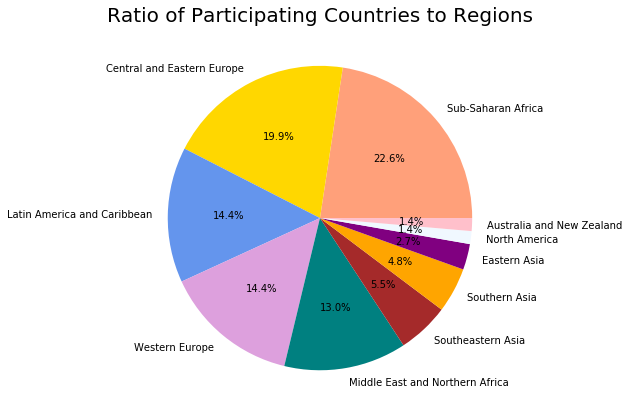

In [10]:
import seaborn as sns
labels = H2017.Region.value_counts().index
colors = ['lightsalmon', 'gold', 'cornflowerblue', 'plum', 'teal', 'brown', 'orange', 'purple', 'aliceblue', 'pink']
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sizes = H2017.Region.value_counts().values
plt.style.use('seaborn-pastel')
plt.figure(figsize = (7,7))
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title("Ratio of Participating Countries to Regions", fontsize = 20)
plt.show()

This pi chart shows the number of country in each region in our data. Sub-Saharan Africa has highest portion, 22.6%. There are only 1.4% countries from North America and also 1.4% from Austrilia and New Zealand, so that our analysis do not focus on this two regions.

# 3. Region Analysis

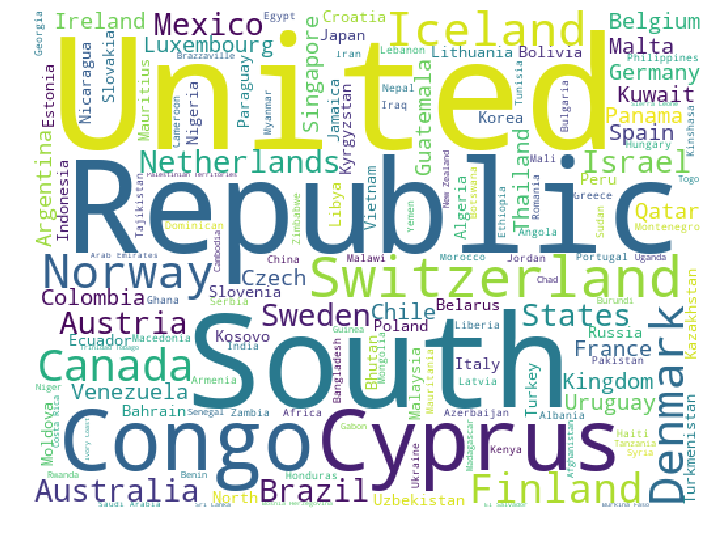

In [11]:
!pip install wordcloud
from wordcloud import WordCloud
x = data['Country']
plt.subplots(figsize=(12,16))
wordcloud = WordCloud(
                          background_color = 'white',
                          width = 512,
                          height = 384
                         ).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

Above is a wordcloud images including all 146 countries' name. Nothing important here, but it's fancy. LOL!!!

## 3.1 Geometric Distribution of Happiness

In [12]:
d2 = dict(type = 'choropleth', 
           locations = data['Country'],
           locationmode = 'country names',
           z = data['Happiness Rank'], 
           text = data['Country'],
           colorbar = {'title':'Happiness rank'})
layout = dict(title = 'Global Happiness', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
layout=go.Layout(autosize=False,width=1000,height=700)
choromap3 = go.Figure(data = [d2], layout=layout)
iplot(choromap3)

This heat map shows the happiness distribution cross 146 countries. 

The darker the orange color, the lower the happiness value and rank. The blank blocks represent missing countries. Apart from the missing countries in our data, countries in Europe are relatively happier. In contrast, several least happy countries widely spread in North America.

We see the geometric positive correlation among happiness level in heat map. In other word, happiness has agglomeration effect. We draw a scatter graph following to empirically show this correlation.

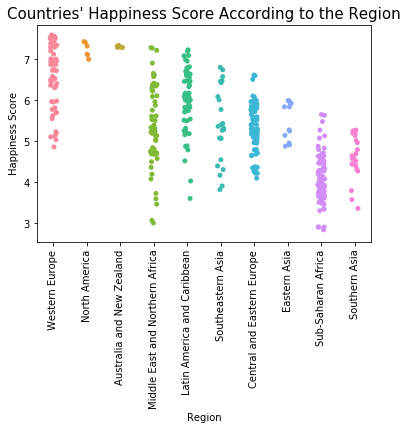

In [13]:
x = sns.stripplot(x ='Region', y = "Happiness Score", data = data, jitter = True)
plt.xticks(rotation = 90)
plt.title("Countries' Happiness Score According to the Region", fontsize = 15)
plt.show()

In the second scatter graph, it also shows the high probability that relative happier country surrounds with relative happier country, while relative less happy country geometrically close to relative less country. This phenomenon makes sense as countries near each others share more similar social and political status.

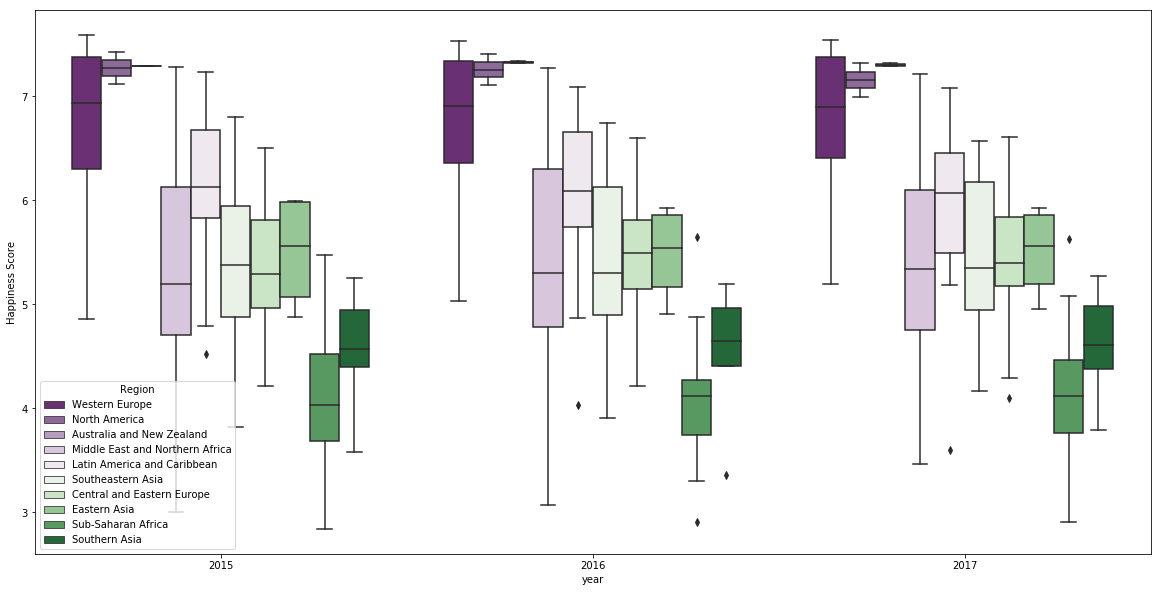

In [14]:
f,ax = plt.subplots(figsize =(20,10))
sns.boxplot(x="year" , y="Happiness Score", hue="Region",data=data,palette="PRGn",ax=ax)
plt.show()

We can see the range of happiness score accoding to ten continent regions in the graph. In Middle East adn Northern Africa, the variance of happiness score maybe the highest because of wars and lower development speed. And Western Europe appears to consolidate a relatively high location in the distribution of happiness socre.

In [15]:
data.loc[(data['year']==2017)&(data['Happiness Rank']<50)]['Region'].value_counts()

Western Europe                     17
Latin America and Caribbean        13
Middle East and Northern Africa     6
Central and Eastern Europe          5
Southeastern Asia                   3
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

The dramatic different among each region also shows when we look into top 50 happy countries. In top 50 happy countries, the number of each region has dramatic difference. For expamle, there are 22 countries in Europe（17 in western Europe, and 5 in Central and Eastern Europe), while only 2 in North America.

## 3.2 Happiness Inequality cross Countries in Europe

Referring to country size and overall happiness level, we choose Europe (Western Europe, and Central and Eastern Europe) be our subject analyzing further in country level.

In [16]:
data['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [17]:
Europe=['Western Europe', 'Central and Eastern Europe']
Asia=['Southeastern Asia', 'Eastern Asia','Southern Asia']
Africa=['Middle East and Northern Africa', 'Sub-Saharan Africa']
America_Austrilia_New_Zealand=['North America','Latin America and Caribbean','Australia and New Zealand']

In [18]:
data_E = data[data['Region'].isin(Europe)].groupby('Country', as_index = False)['Happiness Score'].mean()
data_E = data_E.set_index('Country')

Text(0.5, 0, 'Happiness Score')

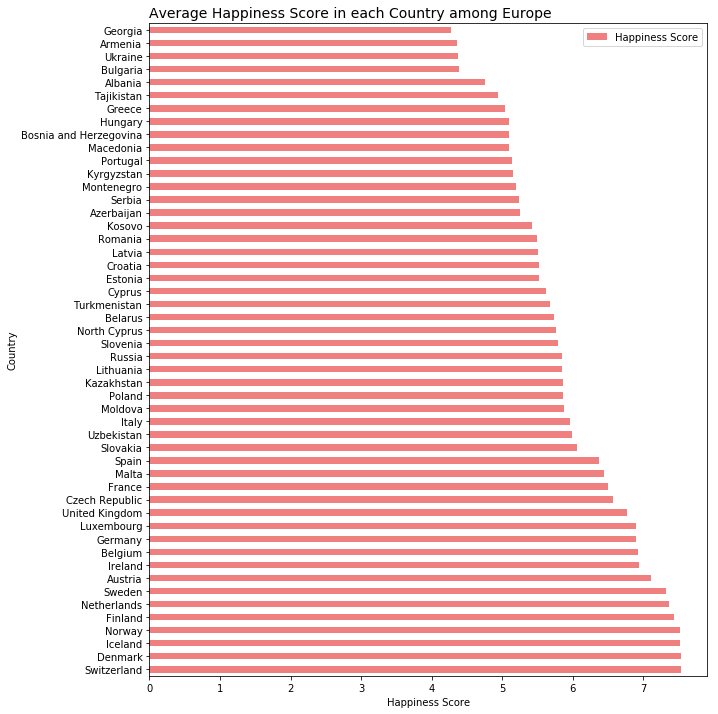

In [19]:
fix, ax = plt.subplots()
data_E.sort_values('Happiness Score', ascending = False).plot(ax = ax, 
                                    kind= 'barh',
                                   color = 'lightcoral',
                                   figsize = (10,12))

ax.set_title('Average Happiness Score in each Country among Europe',fontsize=14, loc = 'left')
ax.set_ylabel('Country')
ax.set_xlabel('Happiness Score')

From the bart charts above, we can see that average happiness score in three years and its ranking in European Countries

Top 5 happest countries in Europe is Switzerland, Denmark, Iceland, Norway and Finland, among which Swiss people feel the happiest. In contrast, 5 least happy countries in Europe is Georgia, Armenia, Ukraine, Bulgaria and Albania, among which Geogia is the lowerest. Although countries in same region may have some similar features, the inequality across the country is in no way futile. Score ranges greatly from above 7 to 4, and we next do a inequality analysis.

In [20]:
data_Europe= data[data['Region'].isin(Europe)][['year','Region','Happiness Score']].groupby(['year','Region']).agg({'Happiness Score':np.std})
data_Europe

Happiness Score
year Region                                     
2015 Central and Eastern Europe         0.570446
     Western Europe                     0.824582
2016 Central and Eastern Europe         0.590395
     Western Europe                     0.789190
2017 Central and Eastern Europe         0.591644
     Western Europe                     0.756891

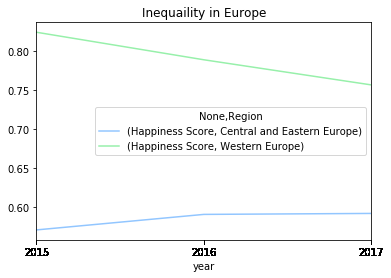

In [21]:
data_Europe.unstack().plot(xticks=(data['year']),title='Inequaility in Europe')

This graph shows changing on happiness inequality among countries.

It is interesting that the trend is different in Western Europe and Central and Eastern Europe. Western Europe has higher inequality value in response to Central and Eastern Europe. But inequaility in Western Europe kept decreading from 2015 to 2017, while inequality keep increasing in Central and Eastern Europe.

## 3.3 Continent Inequality Analysis and Comprison

In this part, we devide regions into five continents: Asia, Europe, America, Africa and Austrilia, among which we focus on Asia and Africa. Our mainly analyze inequlity.

In [22]:
data_Asia= data[data['Region'].isin(Asia)][['year','Region','Happiness Score']].groupby(['year','Region']).agg({'Happiness Score':np.std})
data_Asia

Happiness Score
year Region                            
2015 Eastern Asia              0.575281
     Southeastern Asia         1.000077
     Southern Asia             0.570526
2016 Eastern Asia              0.484432
     Southeastern Asia         0.977487
     Southern Asia             0.616190
2017 Eastern Asia              0.461573
     Southeastern Asia         0.865941
     Southern Asia             0.499732

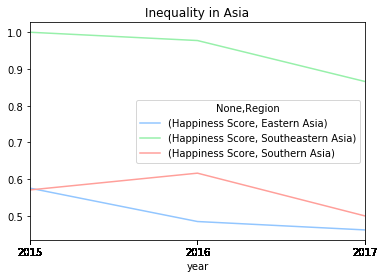

In [23]:
data_Asia.unstack().plot(xticks=(data['year']),title='Inequality in Asia')

This graph shows the inequiality among three regions in Asia.

It is obvious that inequality is different and it also changed differently in response to different regions. Estern Asia has the higest inequaility level, while Southern Asia is has the lowest. And they both kept decreasing from 2015 to 2017. Southeastern Asia had similar inequality level with Southern Asia in 2015, while the inequality among these two regions was apart in 2016 because inequality increased in Southeastern Asia. Surprisely, the inequality ended up same in 2017.

In [24]:
data_Africa= data[data['Region'].isin(Africa)][['year','Region','Happiness Score']].groupby(['year','Region']).agg({'Happiness Score':np.std})
data_Africa

Happiness Score
year Region                                          
2015 Middle East and Northern Africa         1.076169
     Sub-Saharan Africa                      0.604967
2016 Middle East and Northern Africa         1.057559
     Sub-Saharan Africa                      0.516411
2017 Middle East and Northern Africa         0.985246
     Sub-Saharan Africa                      0.548266

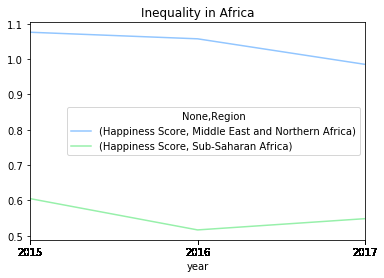

In [25]:
data_Africa.unstack().plot(xticks=(data['year']),title='Inequality in Africa')

This graph shows the inequiality among two regions in Africa.

Middle East and Northern Africa has higher inequaility level, while Sub-Saharan Africa has lower inequaility level. And their inequaility both decrease in 2015. However, Sub-saharan increased in 2016, while Middle East and Northern Africa kept decreasing in 2016.

In [26]:
def TopCountry(a,b):
    dat11 = pd.DataFrame(data[data['Region'].isin(a)].groupby(['Country'])['Happiness Score'].mean()).sort_values('Happiness Score', ascending = False)
    return(dat11.iloc[0:5,].plot(kind = 'barh',title ='Top 5 Country in '+a[0].split()[-1], figsize = (10,3), color = b))

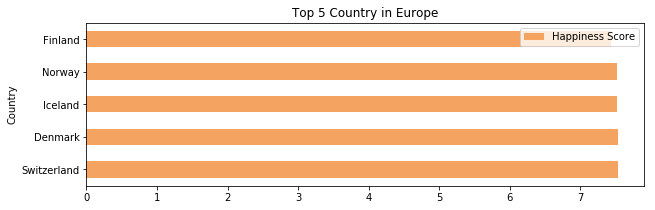

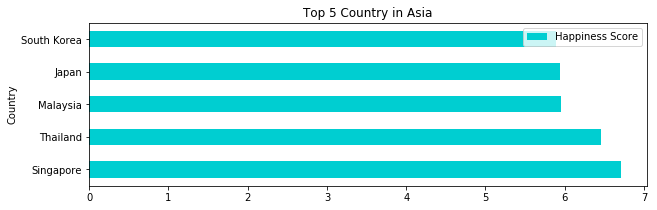

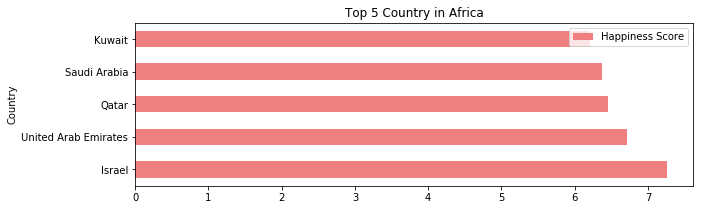

In [27]:
color  = ['sandybrown','darkturquoise','lightcoral','goldenrod']
location=[Europe,Asia,Africa]
for i in range(0,3):
    TopCountry(location[i],color[i])

We also find out each top 5 happy country in Europe, Asia and Africa, which are shows in above 3 bar chart respectively.

# 4. Time analysis

## 4.1 Distribution, Mean and Variation

The world happiness reports track time series data form 2015 to 2017.

Firstly we can compare the mean and variation of the happiness score 2015-2017.

In [28]:
import seaborn as sns

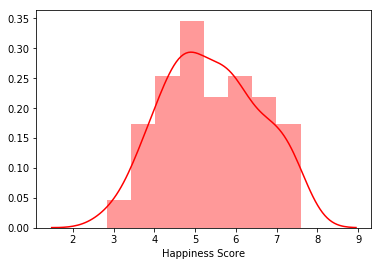

In [29]:
sns.distplot(H2015['Happiness Score'],color = "red")

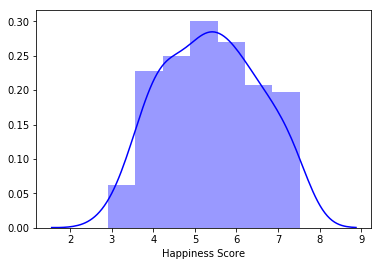

In [30]:
sns.distplot(H2016['Happiness Score'],color = 'blue')

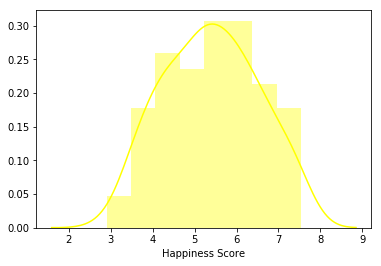

In [31]:
sns.distplot(H2017['Happiness Score'],color = "yellow")

It looks like the mean value of happiness score from 2015 to 2017 is stable, while the variation of happiness score from 2015 to 2017 is decreasing. Let's prove our guess.

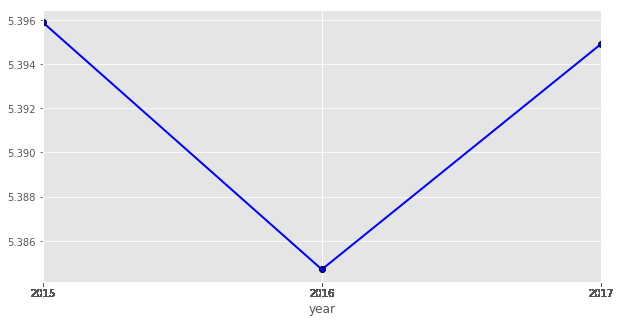

In [32]:
plt.style.use('ggplot')
data_mean=data.groupby(['year'],as_index=False)[['Happiness Score']].mean()
data_mean=data_mean.set_index(['year'])
fig,ax=plt.subplots()
data_mean['Happiness Score'].plot(ax=ax,kind='line',figsize=(10,5),linestyle ='-', 
                          linewidth = 2,color ='blue',marker = 'o',
                          markersize = 6, markeredgecolor='black',markerfacecolor= 'blue',xticks=(data['year']))

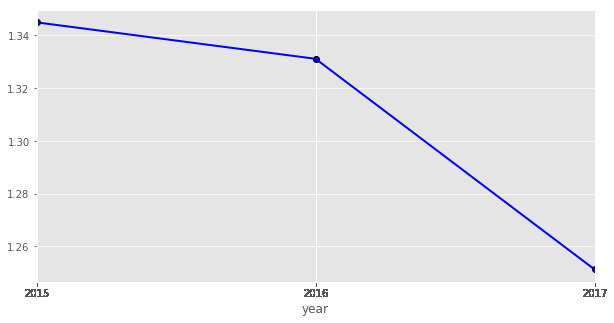

In [33]:
data_var=data.groupby(['year'],as_index=False)[['Happiness Score']].var()
data_var=data_var.set_index(['year'])
fig,ax=plt.subplots()
data_var['Happiness Score'].plot(ax=ax,kind='line',figsize=(10,5),linestyle ='-', 
                          linewidth = 2,color ='blue',marker = 'o',
                          markersize = 6, markeredgecolor='black',markerfacecolor= 'blue',xticks=(data['year']))

The mean of Happiness Score is fluctuant around 5.38, while the variance of Happiness Socore is decreasing, which indicates that the World Happiness Scores are converging towards the average value among these countries. 

## 4.2 Stable Happiness Score 

Secondly, Let's analysis the trend in terms of larger regions, which are

* Australia and New Zealand	
* Central and Eastern Europe	
* Eastern Asia	
* Latin America and Caribbean	
* Middle East and Northern Africa	
* North America	
* Southeastern Asia	
* Southern Asia	
* Sub-Saharan Africa	
* Western Europe	

In [34]:
data.groupby(['year','Region']).agg({'Happiness Score':'mean'})

Happiness Score
year Region                                          
2015 Australia and New Zealand               7.285000
     Central and Eastern Europe              5.332931
     Eastern Asia                            5.496250
     Latin America and Caribbean             6.138762
     Middle East and Northern Africa         5.330789
     North America                           7.273000
     Southeastern Asia                       5.372625
     Southern Asia                           4.580857
     Sub-Saharan Africa                      4.130788
     Western Europe                          6.689619
2016 Australia and New Zealand               7.323500
     Central and Eastern Europe              5.370690
     Eastern Asia                            5.477000
     Latin America and Caribbean             6.056095
     Middle East and Northern Africa         5.386053
     North America                           7.254000
     Southeastern Asia                       5.396750
     Southern Asia                           4.563286
     Sub-Saharan Africa                      4.070455
     Western Europe                          6.685667
2017 Australia and New Zealand               7.299000
     Central and Eastern Europe              5.409931
     Eastern Asia                            5.496500
     Latin America and Caribbean             5.957905
     Middle East and Northern Africa         5.369684
     North America                           7.154500
     Southeastern Asia                       5.444875
     Southern Asia                           4.628429
     Sub-Saharan Africa                      4.121182
     Western Europe                          6.703714

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



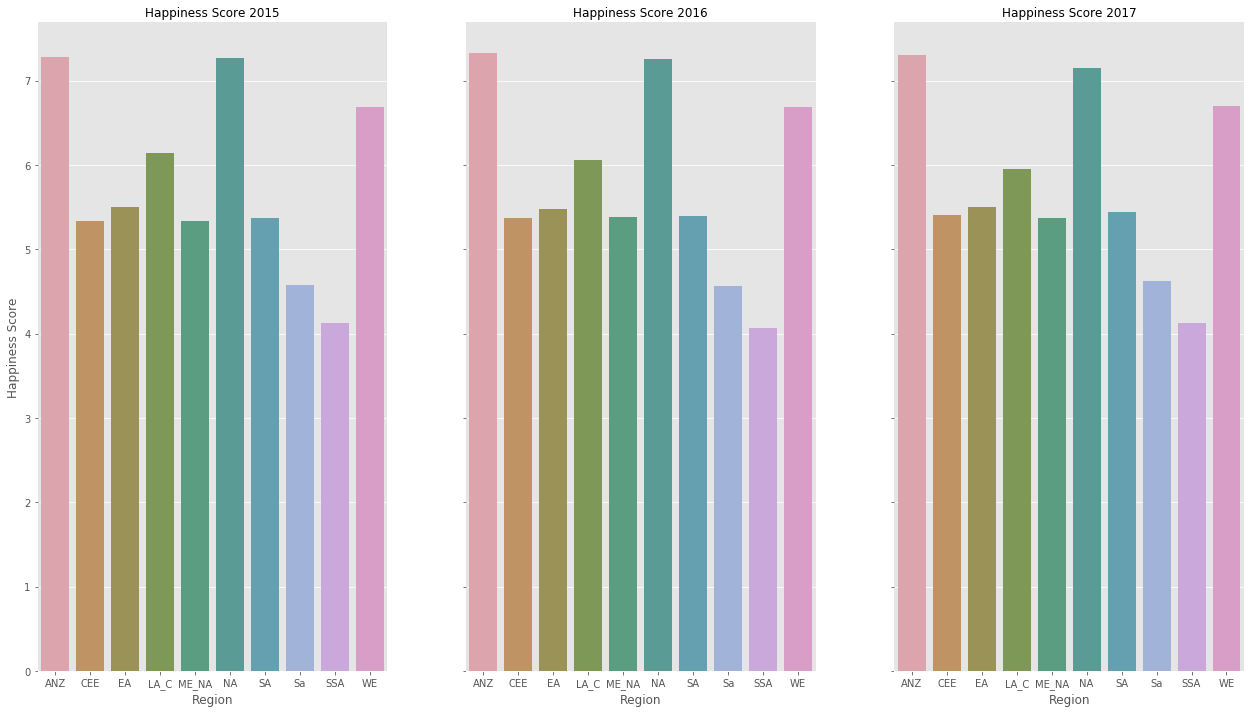

In [35]:
data8=data.groupby(['year','Region'],as_index=False).agg({'Happiness Score':'mean'})
g = sns.factorplot(x = "Region", y = "Happiness Score", col = "year",data = data8, saturation = .5,
                   kind = "bar", ci = None, size = 10, aspect = 0.6)
(g.set_axis_labels("Region", "Happiness Score")
   .set_xticklabels([ 'ANZ','CEE','EA','LA_C','ME_NA','NA','SA','Sa','SSA','WE'])
   .set_titles("Happiness Score {col_name}")
   .despine(left=True))

The Happiness Score in Australia and New Zealand, North America and Western Europe areas stay at highest level for 3 years, while the Happiness Score in Sub-Saharan Africa and Southern Asia regions are lowest 2 for 3 years. We can conclude that the Happiness Score is a relatively stable indicator, which means people in an area are happy this year highly implies that they will be happy next year.

In [36]:
data_country = data[['Country','year','Happiness Score']].set_index('Country')
data_country 
data_country_eachyear = data_country.sort_values(by = 'year', ascending = True).sort_index(kind = 'mergesort')

In [37]:
data_country_year2015 = data_country_eachyear.loc[data_country_eachyear['year'] == 2015]
data_country_year2016 = data_country_eachyear.loc[data_country_eachyear['year'] == 2016]
data_country_year2017 = data_country_eachyear.loc[data_country_eachyear['year'] == 2017]

In [38]:
data_country_2years = pd.merge(data_country_year2015, data_country_year2016, 
                                     left_index = True, right_index = True, how = 'inner')
data_country_3years = pd.merge(data_country_2years, data_country_year2017,
                                   left_index =  True, right_index = True, how = 'inner').loc[:, ['Happiness Score_x','Happiness Score_y', 'Happiness Score']]

In [39]:
data_country_3years.columns = ['2015','2016','2017']

Text(0.5, 0, 'Country')

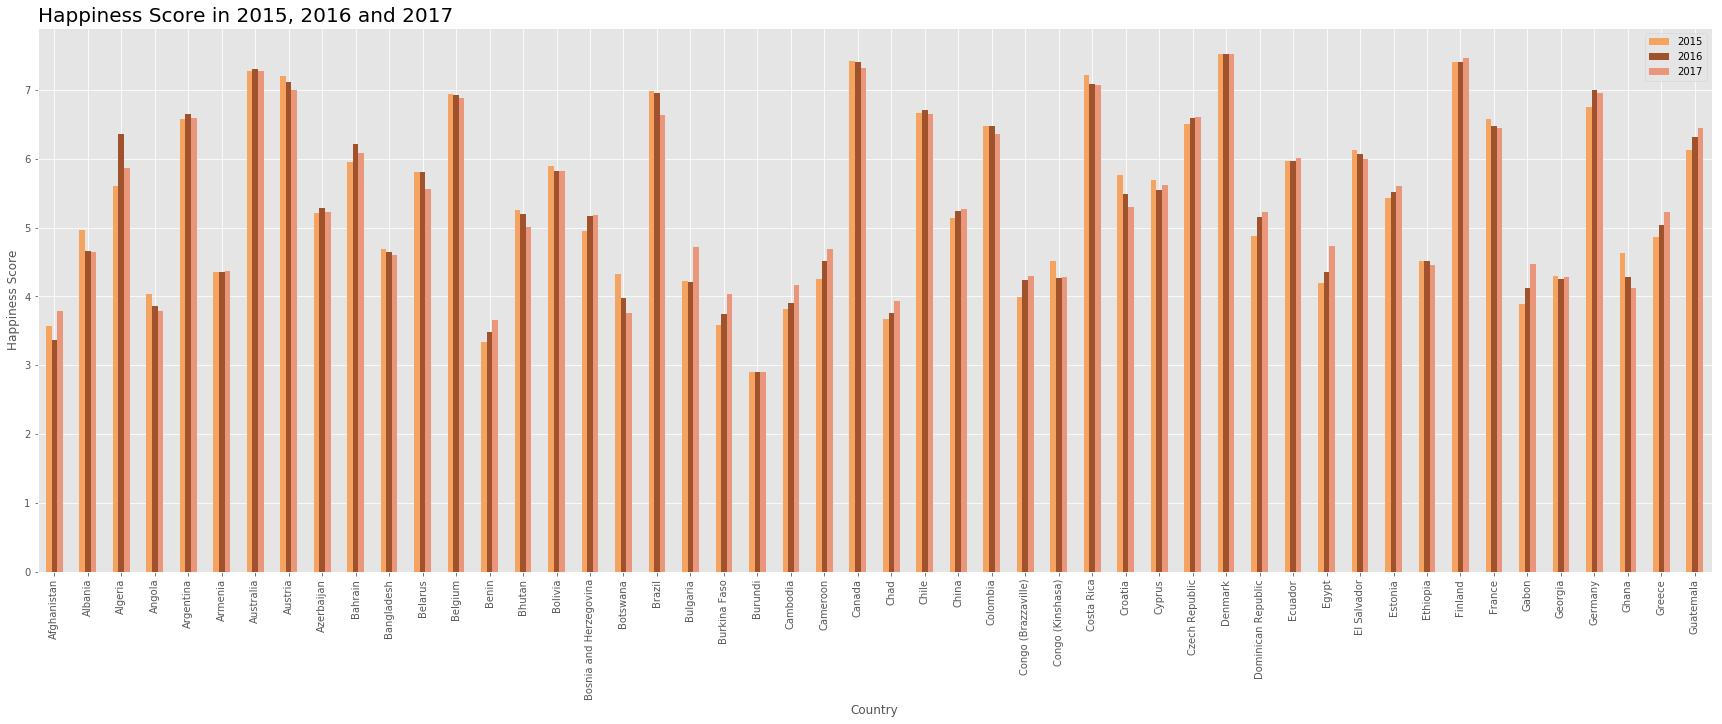

In [40]:
fig, ax = plt.subplots()
data_country_3years.head(50).plot(ax = ax,
                              kind = 'bar',
                              figsize = (30,10),
                              color = ['sandybrown','sienna','darksalmon'])
ax.set_title('Happiness Score in 2015, 2016 and 2017',fontsize=20, loc = 'left')
ax.set_ylabel('Happiness Score')
ax.set_xlabel('Country')
#most country's happiness increase as time goes

To generalize the our conclusion from regional level into country level, we draw a barchart with 50 countries. Then we can still draw a similar conclusion that the Happiness Score is a stable and consistent indicator. The change from 2015 to 2016 and the change from 2016 to 2017 are both samll, which enables a specific country stay in the similar ranking position. Thus, people in this country are happy now could highly imply that people will be happy next year.

## 4.3 Time Trends of Economy, Health, family and Freedom
Thirdly, we are going to analysis the time trend in terms of 4 important factors.
* Economy (GDP per Capita)
* Health (Life Expectancy)
* Family
* Freedom

In [41]:
data_avg=data.groupby('year',as_index=False)['Economy'].mean()
data_avg['Health']=data.groupby('year',as_index=False)['Health'].mean()['Health']
data_avg['Family']=data.groupby('year',as_index=False)['Family'].mean()['Family']
data_avg['Freedom']=data.groupby('year',as_index=False)['Freedom'].mean()['Freedom']
data_avg

year   Economy    Health    Family   Freedom
0  2015  0.862669  0.645873  1.001251  0.426667
1  2016  0.965622  0.564530  0.802187  0.367267
2  2017  1.004099  0.565268  1.205950  0.407877

Text(0.5, 1.0, 'Variable Trend')

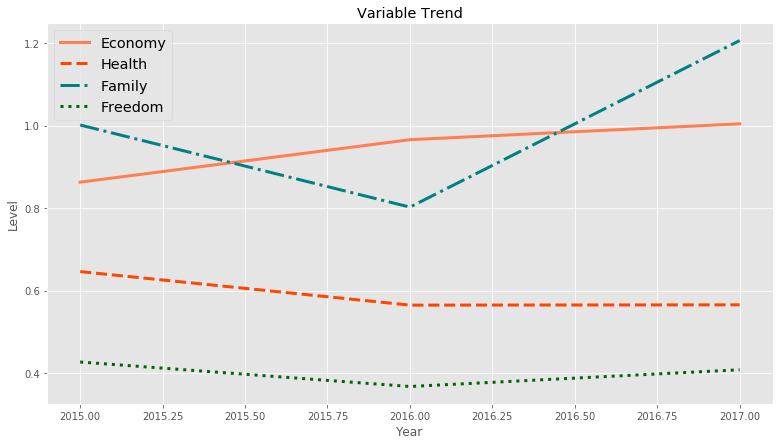

In [42]:
#变量的时间趋势
fig, ax = plt.subplots(figsize = (13,7))

#data3 = data[(data['naics'] < 530) & (data['naics'] > 520) & (data['area'] == 'New York County')]

a1 = plt.plot("year", "Economy", data = data_avg, linewidth = 3, linestyle='-', c = 'coral')
a2 = plt.plot("year", "Health", data = data_avg, linewidth = 3, linestyle='--', c = 'orangered')
a3 = plt.plot("year", "Family", data = data_avg, linewidth = 3, linestyle='-.', c = 'teal')
a4 = plt.plot("year", "Freedom", data = data_avg, linewidth = 3, linestyle=':', c = 'darkgreen')
plt.legend((a1[0], a2[0], a3[0], a4[0]), ('Economy', 'Health', 'Family', 'Freedom'), fontsize = 'x-large')
plt.xlabel('Year')
plt.ylabel('Level')
plt.title('Variable Trend')


The mean Economy score is gradually increasing, which can also indicate tha world economy, especially GDP per capital, is recovering and development. Besides, for Health indicatoer, Family indicator and Freedom indicator, they decrease form 2015 to 2016 and increase from 2016 to 2017, reasons behind need further investigation. In addition, the fluctuation of family is bigger, which may be partially explained by the ambiguity defination of this indicator.

# 5.Factor analysis

In this section, we will play with different variables to find out how they correlate with each other.

## 5.1 Correlation between numerical variables

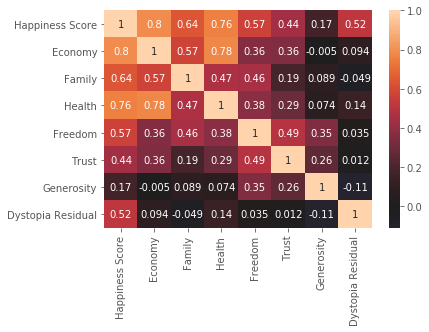

In [43]:
d =data[['Happiness Score',
       'Economy', 'Family', 'Health',
       'Freedom', 'Trust', 'Generosity',
       'Dystopia Residual']].corr()
sns.heatmap(d,center=0,annot=True)


 We have obtained the heatmap of correlation among the variables. The color palette in the side represents the amount of correlation among the variables. The lighter shade represents high correlation.
 Obviously, there is an positive correlation between “Happiness Score” and all the other numerical variables. In other words, the higher the other seven factors that contribute to happiness, the higher the happiness score. According to the above cor plot, Economy, Health, and family play the most significant role in contributing to happiness. Trust and generosity have the lowest impact on the happiness score.

## 5.2 Correlation in jointplot

<Figure size 1440x1440 with 0 Axes>

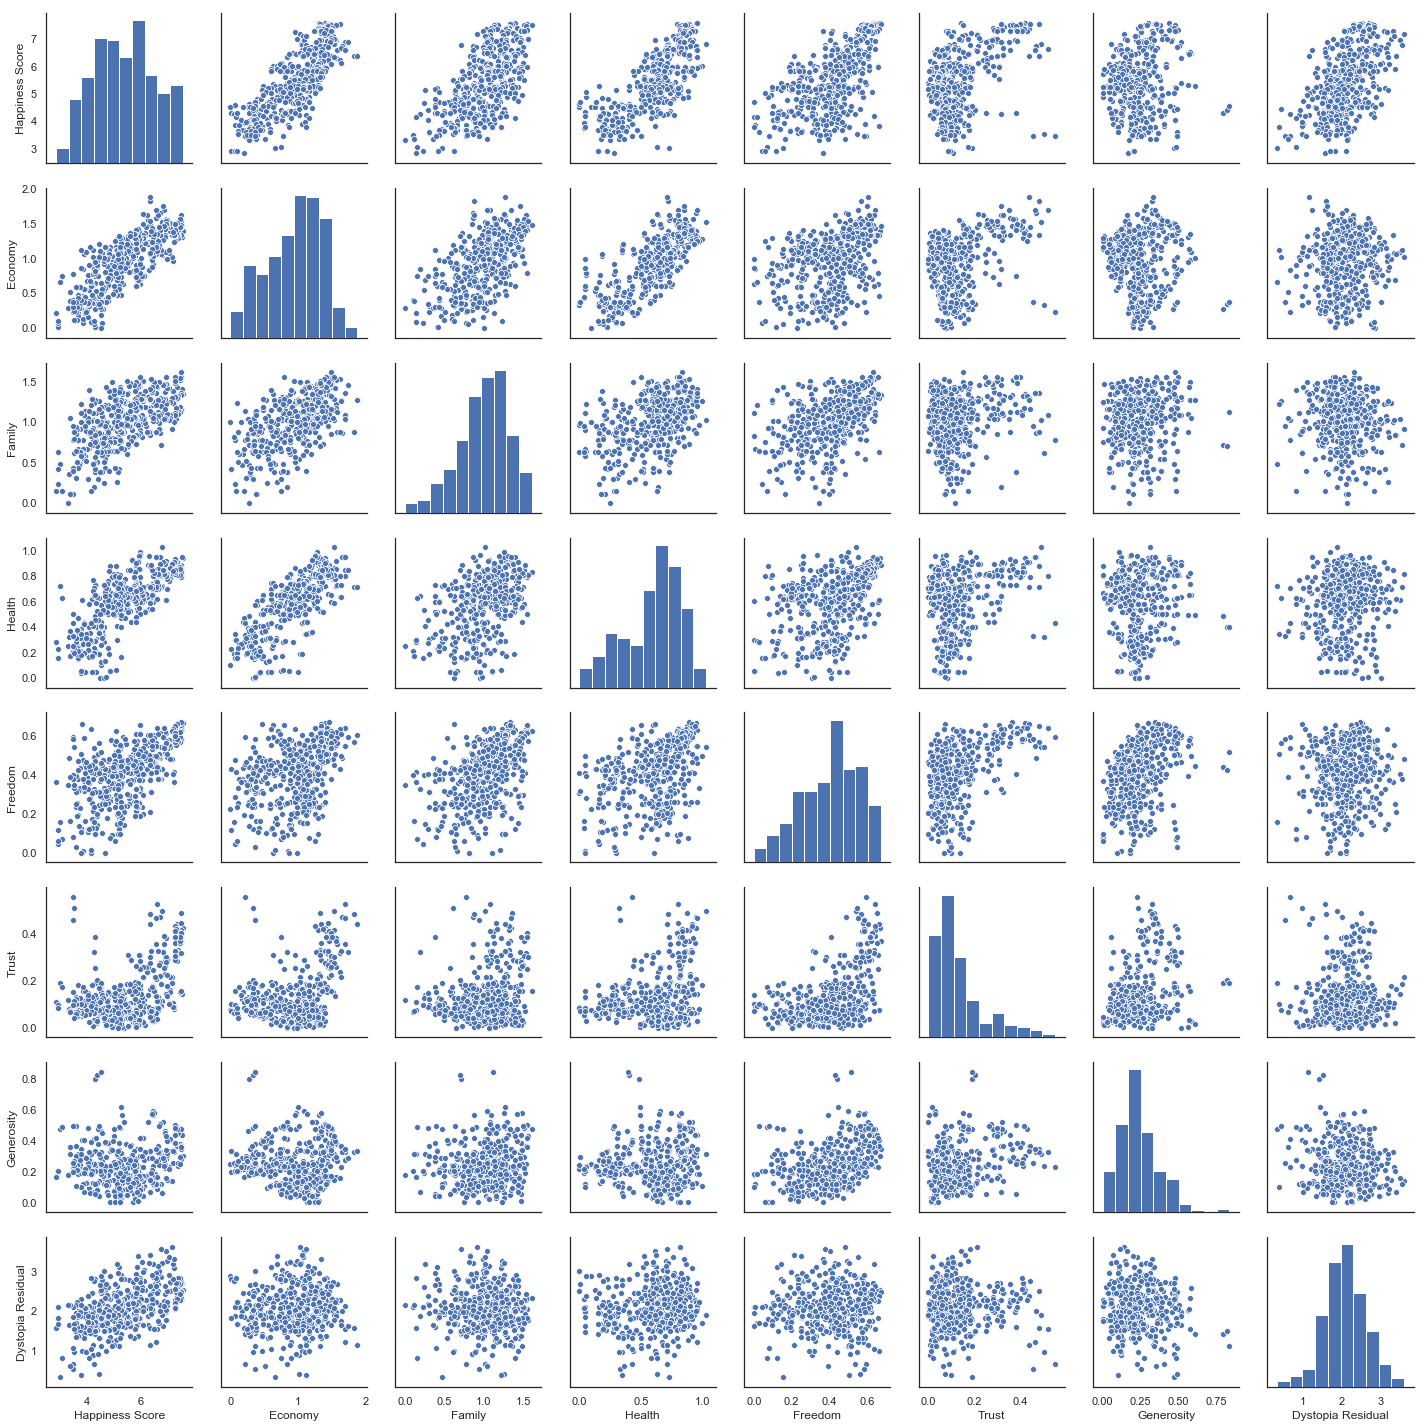

In [44]:
fig = plt.figure(figsize=(20,20))
sns.set(style="white",font_scale=1);
sns.pairplot(data[['Happiness Score','Economy', 'Family', 'Health',
                    'Freedom', 'Trust','Generosity','Dystopia Residual']]);

From pairplot, we can verify our points above: The most correlated features with Happiness Score are Economy, Family, Health and Freedom. It's logical, because intuitively these basic principles provide high level of happy.

## 5.3 Factor graphic contribution

In [45]:
Data=data.rename(columns={'Dystopia Residual': 'Dystopia_Residual'})
df2017 = Data.loc[data['year']==2017].sort_values(by='Happiness Score',ascending=False).iloc[:50, :]

import plotly.graph_objs as go

trace1 = {
  'x': df2017.Country,
  'y': df2017.Economy,
  'name': 'Economy',
  'type': 'bar'
};
trace2 = {
  'x': df2017.Country,
  'y': df2017.Family,
  'name': 'Family',
  'type': 'bar'
};
trace3 = {
  'x': df2017.Country,
  'y': df2017.Health,
  'name': 'Health',
  'type': 'bar'
};
trace4 = {
  'x': df2017.Country,
  'y': df2017.Trust,
  'name': 'Trust',
  'type': 'bar'
};
trace5 = {
  'x': df2017.Country,
  'y': df2017.Generosity,
  'name': 'Generosity',
  'type': 'bar'
};
trace6 = {
  'x': df2017.Country,
  'y': df2017.Freedom,
  'name': 'Freedom',
  'type': 'bar'
};
trace7 = {
  'x': df2017.Country,
  'y': df2017.Dystopia_Residual,
  'name': 'Dystopia Residual',
  'type': 'bar'
};
data3 = [trace1, trace2, trace3, trace4, trace5, trace6, trace7];
layout = {
  'xaxis': {'title': 'Top 50 Countries'},
  'barmode': 'relative',
  'title': 'Top 50 Countries in 2017 According to the Different Parameters'
};
plt.style.use('seaborn-pastel')
fig = go.Figure(data = data3, layout = layout)
iplot(fig)

 In this section, we pick up 50 the most happiest countris during 2017 as a sample set. As is shown in the chart, the contribution to a country's happiness level of each variable is well described in histogram. We can easily find that Dystopia Residual, Economy, Family, Health account for most parts of Happiness Score. Trust plays a least important role in a country happiness level.

## 5.4 Animated bubble charts

In [46]:
!pip install bubbly

In [47]:
from __future__ import division
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=data, x_column='Happiness Score', y_column='Health', 
    bubble_column='Country',time_column='year',  color_column='Region',
    x_title="Happiness Score", y_title="Health", title='Gapminder Global Indicators',
    x_logscale=True, scale_bubble=2, width=1000,height=700)

iplot(figure, config={'scrollzoom': True})

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:156: UserWarning:


Unrecognized config options supplied: ['scrollzoom']

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:156: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



In the graph of time path above, the color represents the region of each country. The X-axis represents the Happiness Score and the Y-axis represents the Health level. In each year, it is found that countries in Sub-Saharan Africa relatively are located at a lower happiness and health level. What's more, countries in Western Europe have the highest average happiness and health level. And a positive correlation between health and happiness level is revealed in the graph.

In [48]:
figure = bubbleplot(dataset=data, x_column='Happiness Score', y_column='Economy', 
    bubble_column='Country',time_column='year',  color_column='Region',
    x_title="Happiness Score", y_title="Economy", title='Gapminder Global Indicators',
    x_logscale=True, scale_bubble=2, width=1000,height=700)

iplot(figure, config={'scrollzoom': True})

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:156: UserWarning:


Unrecognized config options supplied: ['scrollzoom']

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:156: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



In the second bubble plot, the color represents the region of each country. The X-axis represents the Happiness Score and the Y-axis represents the Economy level. In each year, it is also found that countries in Sub-Saharan Africa relatively are located at a lower happiness and economy level. What's more, countries in Western Europe have the highest average happiness and economy level. Certainly, economy effectively have positive influence on happiness level: The higher economy level, the higher happiness score.

In [49]:
figure = bubbleplot(dataset=data, x_column='Happiness Score', y_column='Family', 
    bubble_column='Country',time_column='year',  color_column='Region',
    x_title="Happiness Score", y_title="Family", title='Gapminder Global Indicators',
    x_logscale=True, scale_bubble=2, width=1000,height=700)

iplot(figure, config={'scrollzoom': True})

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:156: UserWarning:


Unrecognized config options supplied: ['scrollzoom']

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:156: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



In the last bubble graph, the color represents the region of each country. The X-axis represents the Happiness Score and the Y-axis represents the variable Family. In each year, it is found that countries in Sub-Saharan Africa may ignore family factor when it comes to happiness. What's more, people in countries in Western Europe tend to focus on the positive effects of family on happiness. As family index increases during countries, the happiness score gets higher.

## 5.5 Joint Distribution

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



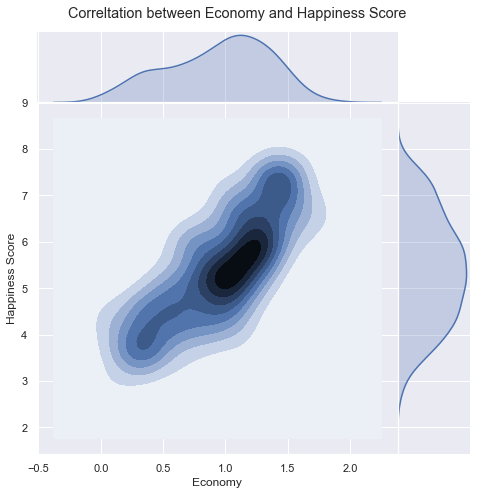

In [50]:
sns.set(font_scale = 1)



g = sns.jointplot('Economy', 'Happiness Score', kind = "kde", size = 7, space = 0, color = "b", data = data)
g.set_axis_labels('Economy', 'Happiness Score')
plt.subplots_adjust(top = 0.93)
g.fig.suptitle('Correltation between Economy and Happiness Score') 
plt.style.use('ggplot')

The graph here shows the joint distribution bewteen Economy and Happiness Score for 155 countries worldwide. We can see that majority of countries have over 1.0 economy level and their happiness index is above 5.0. Similarly, countries with deeper economy development always have a higher happiness level. Those are the most representative happiness distribution with respect to economy.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



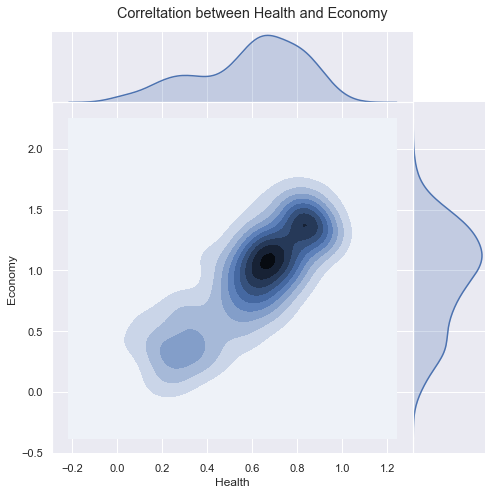

In [51]:
sns.set(font_scale = 1)



g = sns.jointplot('Health', 'Economy', kind = "kde", size = 7, space = 0, color = "b", data = data)
g.set_axis_labels('Health', 'Economy')
plt.subplots_adjust(top = 0.93)
g.fig.suptitle('Correltation between Health and Economy') 
plt.style.use('ggplot')

The graph here shows the joint distribution bewteen Economy and Health for 155 countries worldwide. We can see that majority of countries have over 1.0 economy level and their health level is above 0.6. According to the chart and considering the welfare policy in developed countries, people are more healthier in those countries with deeper economy development. Those are the most representative economy level with respect to health.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



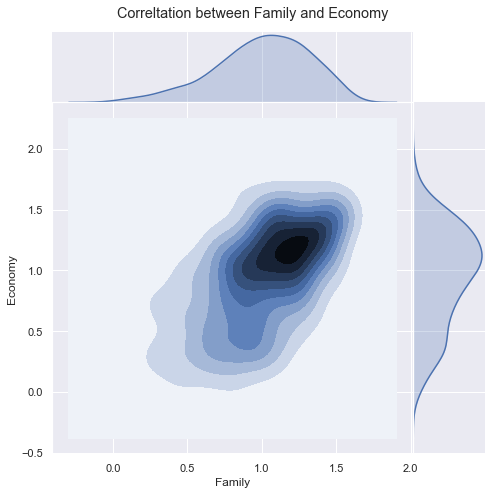

In [52]:
sns.set(font_scale = 1)



g = sns.jointplot('Family', 'Economy', kind = "kde", size = 7, space = 0, color = "b", data = data)
g.set_axis_labels('Family', 'Economy')
plt.subplots_adjust(top = 0.93)
g.fig.suptitle('Correltation between Family and Economy') 
plt.style.use('ggplot')

The graph here shows the joint distribution bewteen Economy and Family for 155 countries worldwide. We can see that majority of countries have over 1.0 economy level and their family index is above 1.0 which indicates those people appear not to be single. In summary, in countries with deeper economy development, people have a stronger incentive  and higher economy ability to get married and bring uo children. Those are the most representative economy distribution with respect to family.

# 6. Conclusions

Overall, The rankings of country happiness are based on the pooled results from Gallup World Poll surveys from 2015-2017, and continue to show both change and stability. As shown by our league tables for happiness and its supports, top countries tend to have high values for most of the key variables that have been found to support well-being: income, healthy life expectancy, social support, freedom, trust and generosity, to such a degree that year to year changes in the top rankings are to be expected. With its continuing upward trend in average scores, Switzerland consolidated its hold on first place, ahead of an also-rising Denmark in second place.

Region analysis:

At a global level, we introduce country distribution according to ten continent regions in our dataset. Then through the vivid world map, the distribution of average Happiness Score and rankings are easily find in each country. By picking up Europe to conduct specific analysis, we export rankings of European Countries. Next section followed is inequality analysis among continents and comparison analysis with Europe. What about Happiness inequality? Since 2016, the mid-point of our data period, well-being inequality has fallen insignificantly in South Asia, Southeast Asia, Western Europe, while increasing significantly in most other regions, including especially Sub-Saharan Africa.

Time analysis:

We started by tracing the trajectories of happiness, and its distribution, primarily based on annual population-weighted averages for the world as a whole and for its ten constituent regions. This was followed by our sample set of 50 countries according to their trend of Happiness Score over the previous three years. We then presented 2015-2017 changes in key factors: Economy (GDP per Capita), Health (Life Expectancy), Family, Freedom.

Factor analysis:

Finally, we make deeper research in variable analysis. During correlation analysis, it is easily found that Happiness is positively correlated with included variables such as economy, health and family etc. However, the contribution extent varies among different factors: Economy tends to have a great influence on people’s satisfactoriness while the trust in government has little difference. This phenomenon may provide some meaning for country development when it comes to welfare policy and social harmony. Also, we do analysis to find some rules among factors such as economy and health. The finding agrees with our intuition because as economy is on a high development speed, the health policy tend to cover more aspects and medical equipment is more advanced.
